Exploratory Data Analysis on StackOverflow Survey Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating the datframes for eda.
survey_raw_df=pd.read_csv("survey_results_public.csv",index_col="ResponseId")

In [20]:
survey_raw_df

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [10]:
for col in survey_raw_df.columns:
    print(col)

ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

In [18]:
survey_raw_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

Here we are taking only the question column from the schema file and mapping in with qname column for better understanding in analysis.

In [3]:
# now we create the dataframe for survey results schema csv file.

schema_raw=pd.read_csv("survey_results_schema.csv",index_col="qname").question

In [24]:
schema_raw['Employment']

'Which of the following best describes your current employment status? Select all that apply.*'

DATA PREPROCESSING AND DATA CLEANING FOR EDA.

The survey responses contain a wealth of information, therefore we are going to limit our analysis to some following areas:

1. Demographics
2. Distribution of Skills
3. Employment related information

In [4]:
# we will create a new df for our suvery_raw_df for the only columns we needed to analyse the data.

selected_columns = [
    'MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
    'LearnCode', 'LearnCodeOnline', 'YearsCode', 'YearsCodePro', 'DevType',
    'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
    'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'NEWSOSites',
    'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'Age', 'TBranch',
    'ICorPM', 'WorkExp', 'TimeSearching', 'TimeAnswering',
    'ProfessionalTech', 'ConvertedCompYearly'
]


In [26]:
len(selected_columns)

33

In [77]:
survey_df=survey_raw_df[selected_columns].copy()

In [31]:
survey_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,TBranch,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Employed, full-time",Remote,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,Under 18 years old,No,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,20,17,"Developer, full-stack",NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",35-44 years old,Yes,Individual contributor,17.0,NaN,NaN,NaN,NaN
3,I am a developer by profession,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,37,27,Developer Experience,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,Google Cloud,Google Cloud,Stack Overflow;Stack Exchange;Stack Overflow B...,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",45-54 years old,No,NaN,NaN,NaN,NaN,NaN,NaN
4,I am learning to code,"Student, full-time",NaN,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,4,NaN,"Developer, full-stack",NaN,NaN,NaN,Canada,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,Amazon Web Services (AWS);Fly.io;Heroku,Amazon Web Services (AWS);Vercel,Stack Overflow,Daily or almost daily,No,NaN,"No, not really",18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,I am a developer by profession,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,9,NaN,"Developer, full-stack",NaN,NaN,NaN,Norway,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65433,I am a developer by profession,"Employed, full-time",Remote,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,5,3,Blockchain,2 to 9 employees,I have some influence,Ask developers I know/work with;Ask a generati...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,I am a developer by profession,"Employed, full-time",Remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,NaN,NaN,NaN,NaN,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,I am a developer by profession,"Employed, full-time",In-person,Hobby,"Bachelor’s degree (B.A., B.S., B.E

In [34]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 1 to 65437
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              65437 non-null  object 
 1   Employment              65437 non-null  object 
 2   RemoteWork              54806 non-null  object 
 3   CodingActivities        54466 non-null  object 
 4   EdLevel                 60784 non-null  object 
 5   LearnCode               60488 non-null  object 
 6   LearnCodeOnline         49237 non-null  object 
 7   YearsCode               59869 non-null  object 
 8   YearsCodePro            51610 non-null  object 
 9   DevType                 59445 non-null  object 
 10  OrgSize                 47480 non-null  object 
 11  PurchaseInfluence       47406 non-null  object 
 12  BuyNewTool              45181 non-null  object 
 13  Country                 58930 non-null  object 
 14  Currency                46684 non-null  obj

Now we correct the datatype for our columns.

In [6]:
# 1. Converting YearsCode into numeric data.

survey_df.YearsCode.value_counts()    

# we have less than 1 year and more than 50 years values are more than 800. We can't remove them or make them NaN so we are converting the into 0.5 and 51.



YearsCode
10                    4561
5                     3723
6                     3496
8                     3449
7                     3333
4                     3290
15                    2813
20                    2636
12                    2559
3                     2518
9                     2251
14                    1822
25                    1671
2                     1642
11                    1636
13                    1477
30                    1461
16                    1401
18                    1228
17                    1038
40                     993
24                     870
22                     842
35                     735
1                      712
23                     634
26                     630
Less than 1 year       569
19                     561
21                     522
28                     512
27                     504
32                     328
34                     293
42                     289
38                     285
29                

In [7]:
# we have less than 1 year and more than 50 years values are more than 800. We can't remove them or make them NaN so we are converting the into 0.5 and 51.


survey_df["YearsCode"] = survey_df["YearsCode"].replace({
    "Less than 1 year": "0.5",
    "More than 50 years": "51"
})

survey_df["YearsCode"] = pd.to_numeric(survey_df["YearsCode"], errors="coerce")


In [8]:
# 2. Converting YearsCodepro into numeric data.
survey_df.YearsCodePro.value_counts()  

YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                     169
38                     134
33             

In [9]:
# Here we have less than 1 year and more than 50 years values are more than 2500. We can't remove them or make them NaN so we are converting the into 0.5 and 51.


survey_df["YearsCodePro"] = survey_df["YearsCodePro"].replace({
    "Less than 1 year": "0.5",
    "More than 50 years": "51"
})

survey_df["YearsCodePro"] = pd.to_numeric(survey_df["YearsCodePro"], errors="coerce")


In [41]:
survey_df.describe()

,YearsCode,YearsCodePro,CompTotal,WorkExp,ConvertedCompYearly
count,59869.000000,51610.000000,3.374000e+04,29658.000000,2.343500e+04
mean,14.202250,10.212013,2.963841e+145,11.466957,8.615529e+04
std,10.649204,9.079437,5.444117e+147,9.168709,1.867570e+05
min,0.500000,0.500000,0.000000e+00,0.000000,1.000000e+00
25%,6.000000,3.000000,6.000000e+04,4.000000,3.271200e+04
50%,11.000000,7.000000,1.100000e+05,9.000000,6.500000e+04
75%,20.000000,15.000000,2.500000e+05,16.000000,1.079715e+05
max,51.000000,51.000000,1.000000e+150,50.000000,1.625660e+07


In [10]:
# we have many columns who have multiple values combines so we have to seprate them for better analysis so we are creating a function for spliting a column .

def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [11]:
# Now we are converting our employment column into an dataframe.
employment_type_df = split_multicolumn(survey_df.Employment)

In [12]:
employment_type_df.sum()

Employed, full-time                                     45162
Student, full-time                                       8626
Not employed, but looking for work                       3954
Independent contractor, freelancer, or self-employed    10726
Not employed, and not looking for work                   1203
Student, part-time                                       2656
Employed, part-time                                      4145
I prefer not to say                                       546
Retired                                                   681
dtype: int64

EXPLORATORY DATA ANALYSIS

In [53]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 1 to 65437
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              65437 non-null  object 
 1   Employment              65437 non-null  object 
 2   RemoteWork              54806 non-null  object 
 3   CodingActivities        54466 non-null  object 
 4   EdLevel                 60784 non-null  object 
 5   LearnCode               60488 non-null  object 
 6   LearnCodeOnline         49237 non-null  object 
 7   YearsCode               59869 non-null  float64
 8   YearsCodePro            51610 non-null  float64
 9   DevType                 59445 non-null  object 
 10  OrgSize                 47480 non-null  object 
 11  PurchaseInfluence       47406 non-null  object 
 12  BuyNewTool              45181 non-null  object 
 13  Country                 58930 non-null  object 
 14  Currency                46684 non-null  obj

C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_15624\3979499417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mb=sns.countplot(data=survey_df,x='MainBranch',palette='Set1')


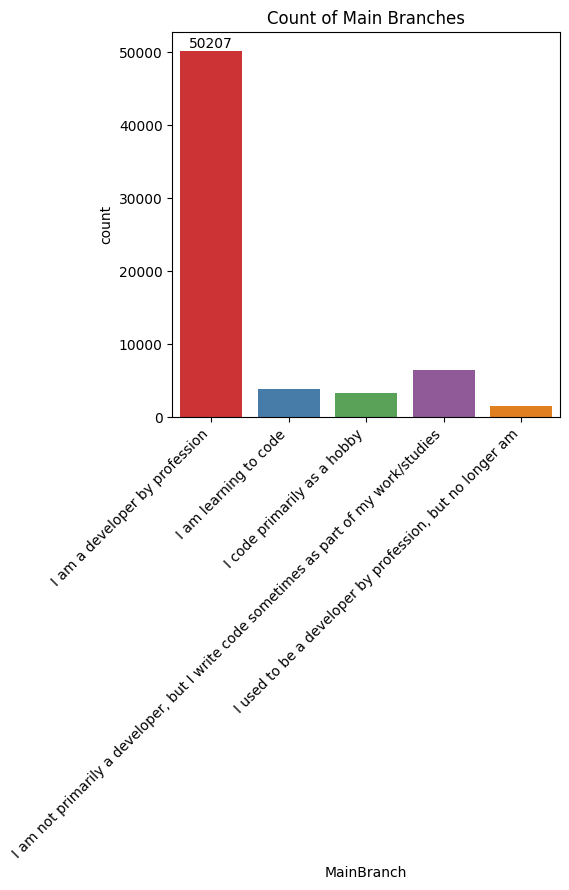

In [13]:
# Count of main branches.
plt.figure(figsize=(5,5))
mb=sns.countplot(data=survey_df,x='MainBranch',palette='Set1')
mb.bar_label(mb.containers[0])
plt.title("Count of Main Branches")
plt.xticks(rotation=45,ha='right')
plt.show()

From the above chart we can conclude that the count of Developers are very high in Main Branch.

C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_15624\2721693004.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  emp=sns.barplot(x = employment_count.index,y = employment_count,palette='husl')


Text(0, 0.5, 'Count')

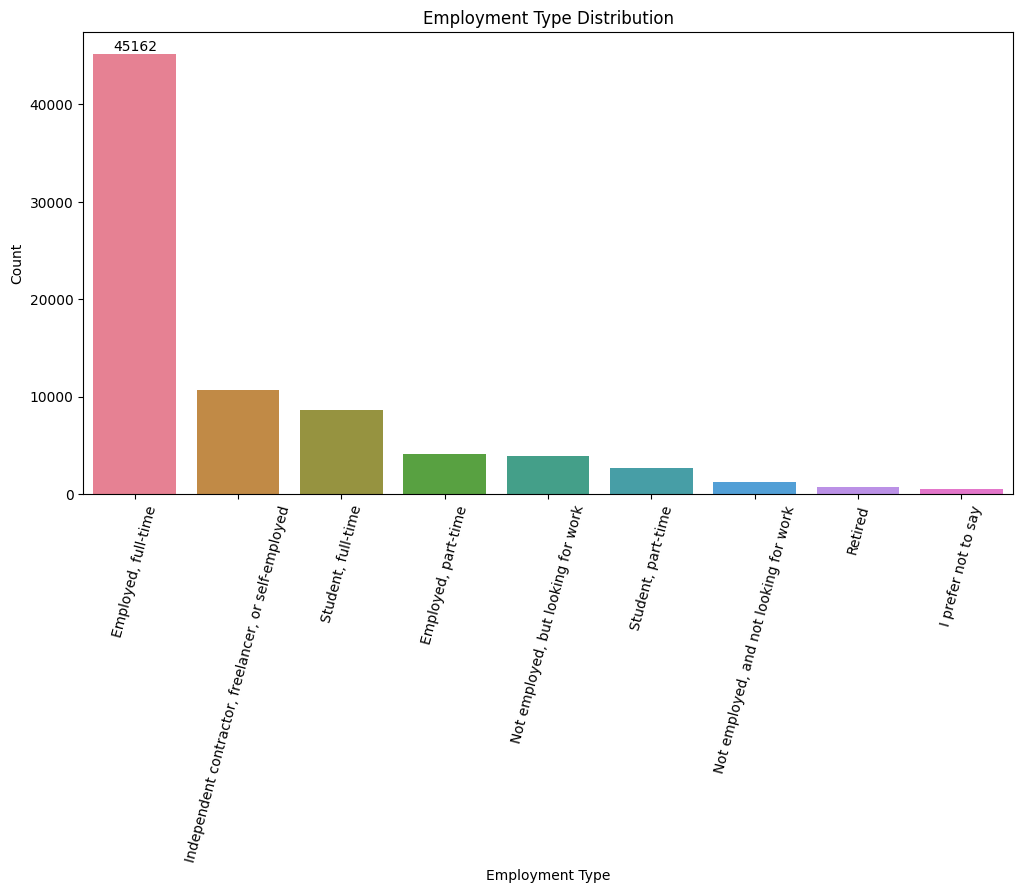

In [14]:
# Now we count the employment types in data.

# emp=sns.countplot(data=survey_df,x='Employment')

employment_count = split_multicolumn(survey_df.Employment).sum().sort_values(ascending=False)

plt.figure(figsize = (12,6))
plt.xticks(rotation = 75)
emp=sns.barplot(x = employment_count.index,y = employment_count,palette='husl')
emp.bar_label(emp.containers[0])
plt.title("Employment Type Distribution")
plt.xlabel("Employment Type")
plt.ylabel("Count")

C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_15624\1350352671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  rw=sns.countplot(data=survey_df,x='RemoteWork',palette='dark',legend=False)


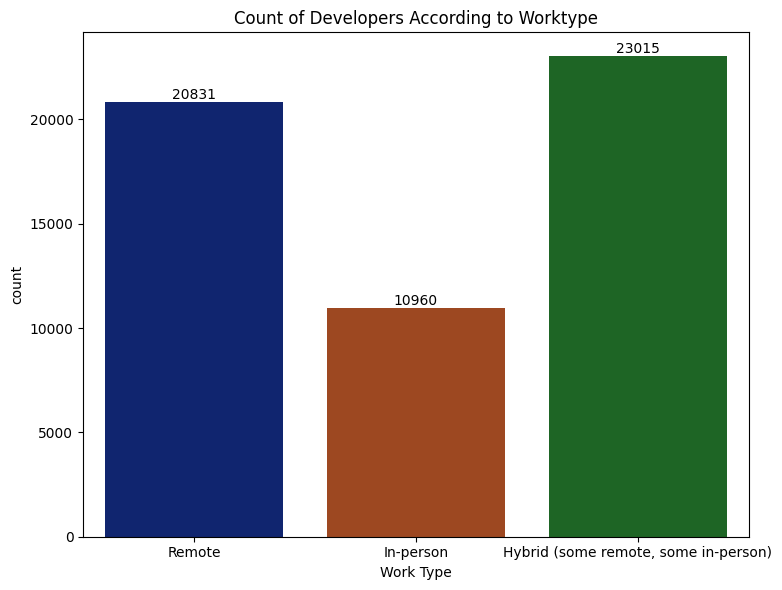

In [32]:
# Now we find the number of developers on the basis of work type.
plt.figure(figsize=(8,6))
rw=sns.countplot(data=survey_df,x='RemoteWork',palette='dark',legend=False)
for container in rw.containers:
    rw.bar_label(container,label_type='edge')
plt.title("Count of Developers According to Worktype")
plt.xlabel('Work Type')

plt.tight_layout()
plt.show()

From the above chart we get the result that the most number of Developer's choses the Hybrid WorkType.



C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_15624\3716027630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ed=sns.countplot(data=survey_df,x='EdLevel',palette='dark')


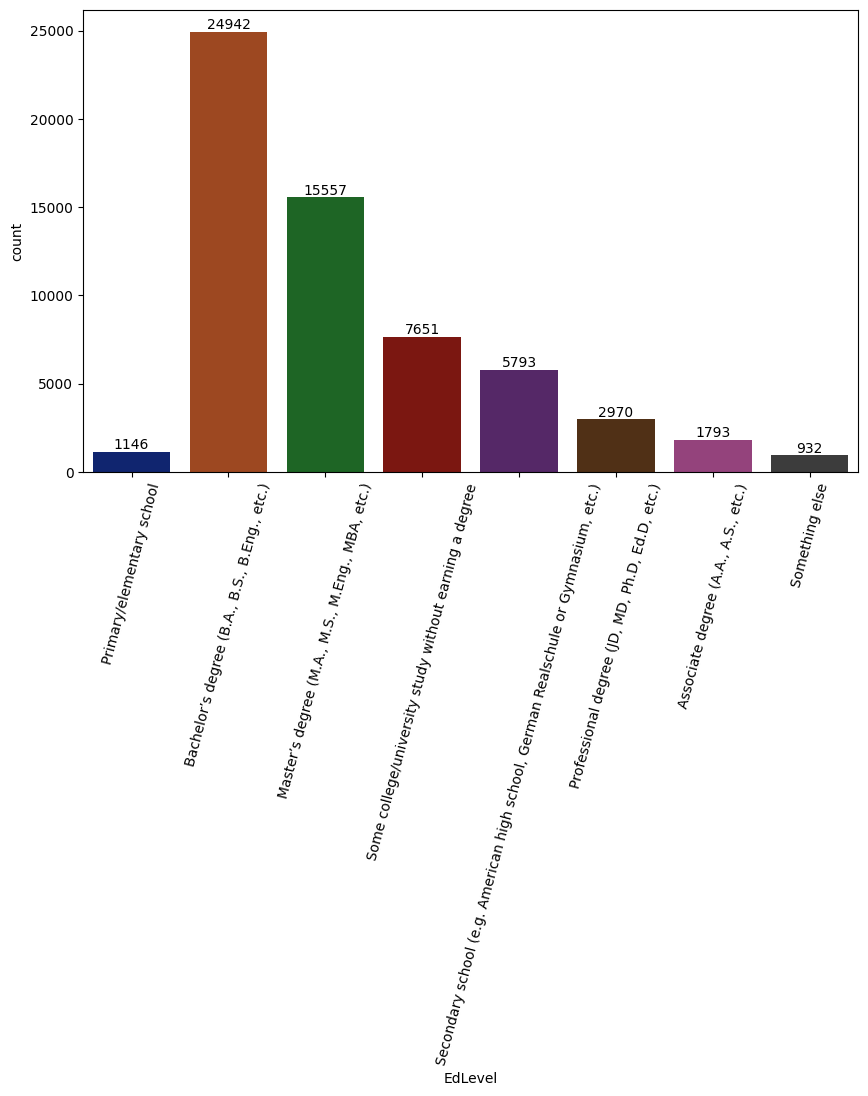

In [47]:
# Now we find the developer's education.
plt.figure(figsize=(10,6))
ed=sns.countplot(data=survey_df,x='EdLevel',palette='dark')
for conatiner in ed.containers:
    ed.bar_label(conatiner,label_type='edge')
plt.xticks(rotation=75)
plt.show()

From the above chart we can conclude that the most developer's have Bachelor's degree.

C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_15624\505393587.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cn=sns.barplot(x=top_5_Country.index,y=top_5_Country,palette='dark')


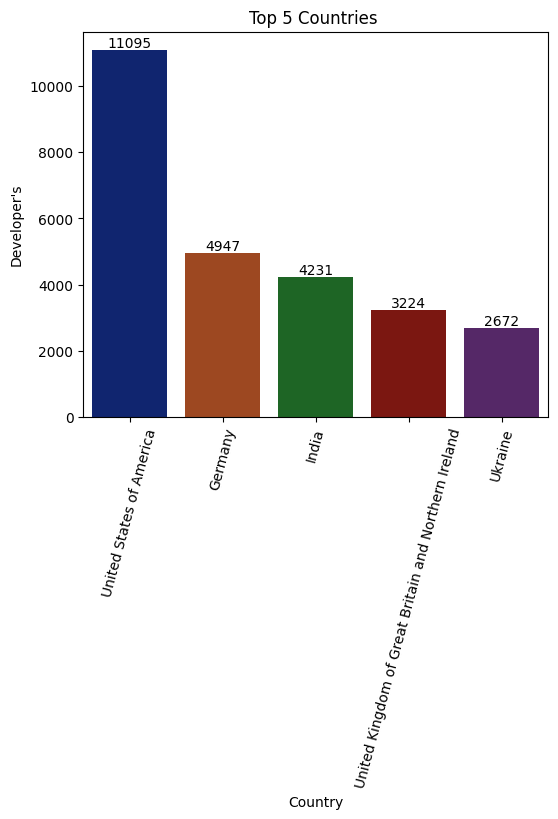

In [ ]:
# We have more than 180 countries in our data so we are finding the top 5 countries in the population of developer's.
top_5_Country=survey_df.Country.value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(6,5))
cn=sns.barplot(x=top_5_Country.index,y=top_5_Country,palette='dark')
for conatiner in cn.containers:
    cn.bar_label(conatiner,label_type="edge")


plt.title("Top 5 Countries ")
plt.xlabel("Country")
plt.ylabel("Developer's")
plt.xticks(rotation=75)
plt.show()

USA Has the most developer's in world.

C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_15624\365018842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_grp=sns.countplot(data=survey_df,x='Age',palette='dark')


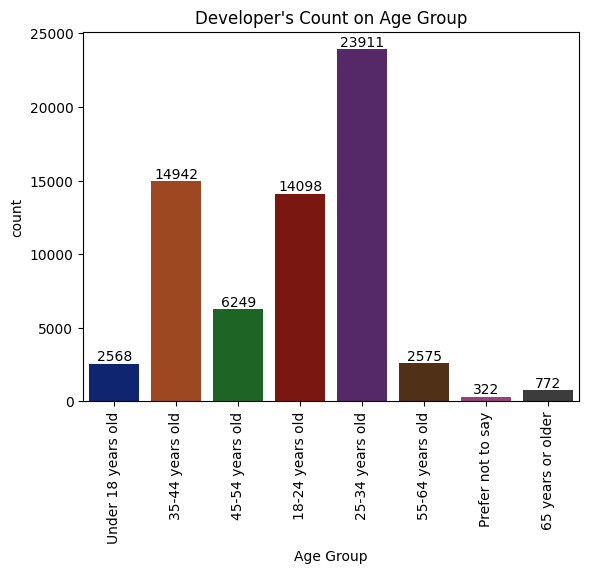

In [70]:
# Now we find the Developer's count on the basis of age-group.

plt.Figure(figsize=(8,6))
age_grp=sns.countplot(data=survey_df,x='Age',palette='dark')
for conatiner in age_grp.containers:
    age_grp.bar_label(conatiner,label_type='edge')

plt.xlabel('Age Group')
plt.title("Developer's Count on Age Group")
plt.xticks(rotation=90)
plt.show()


Now we will find the count of Developer's on language's on whom the developer's wanted to work or worked on them.

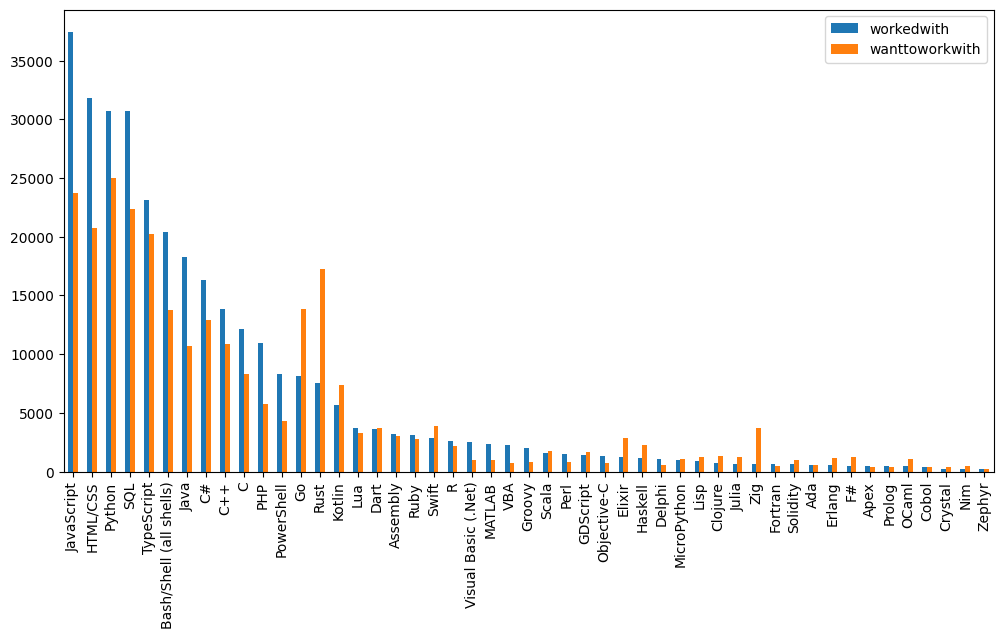

In [75]:
hw = split_multicolumn(survey_df.LanguageHaveWorkedWith).sum().sort_values(ascending=False)

ww = split_multicolumn(survey_df.LanguageWantToWorkWith).sum().sort_values(ascending=False)


combined_df = pd.concat([hw,ww],axis=1)
combined_df.columns = ['workedwith','wanttoworkwith']
cd=combined_df.plot(kind='bar', figsize = (12,6))

Now we will find the Platform Choice of developer's.

Text(0.5, 1.0, "Platform Choices of Developer's")

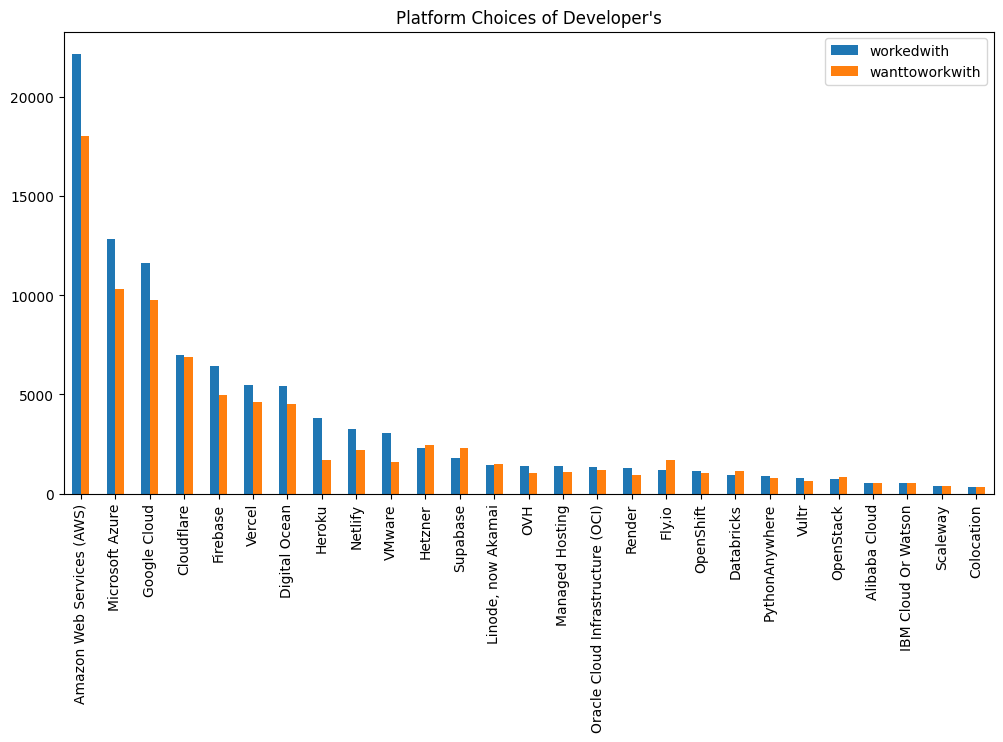

In [78]:
a = split_multicolumn(survey_df.PlatformHaveWorkedWith).sum().sort_values(ascending=False)

b = split_multicolumn(survey_df.PlatformWantToWorkWith).sum().sort_values(ascending=False)

combined_df = pd.concat([a,b],axis=1)
combined_df.columns = ['workedwith','wanttoworkwith']
combined_df.plot(kind='bar', figsize = (12,6))
plt.title("Platform Choices of Developer's")